In [1]:
%matplotlib inline
import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt

In [2]:
n_samples = 5 * np.ones(4, dtype=int)
dose = np.array([-0.86,-0.3,-.05,.73])
deaths = np.array([0,1,3,5])

In [3]:
def invlogit(x):
    return np.exp(x)/(1+np.exp(x))

In [18]:
def p_posterior(alpha,beta,dose,obs_deaths,n):
    p=[]
    for dose_i,obs_deaths_i,n_i in zip(dose,obs_deaths,n):
        theta_i = invlogit(alpha+beta*dose_i)
        p.append(theta_i**obs_deaths_i*(1-theta_i)**(n_i-obs_deaths_i))
    p=np.array(p)
    return np.prod(p,axis=0)

In [6]:
# interlude
a = [1,2,3,4]
b = [5,6,7,8]
for i in range(4):
    print(a[i],b[i],a[i]*b[i])

1 5 5
2 6 12
3 7 21
4 8 32


In [8]:
for aa,bb in zip(a,b):
    print(aa,bb)

1 5
2 6
3 7
4 8


In [13]:
list(zip(a,b,a))[2]

(3, 7, 3)

In [12]:
for i,aa in enumerate(a):
    print(i,aa)

0 1
1 2
2 3
3 4


In [19]:
# end of interlude
delta = 0.1
alpha = np.arange(-5.0,10.0+delta, delta)
beta = np.arange(-10,40+delta,delta)
ALPHA, BETA = np.meshgrid(alpha,beta)
P = p_posterior(ALPHA,BETA,dose,deaths,n_samples)

(0, 25)

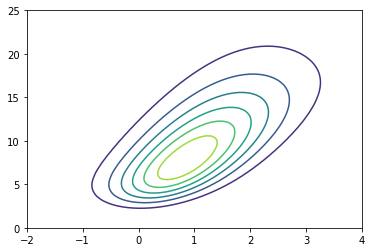

In [20]:
plt.figure()
CS = plt.contour(ALPHA,BETA,P)
plt.xlim((-2,4))
plt.ylim((0,25))